In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
import phik
from sklearn.metrics import (
    r2_score, 
    mean_absolute_error, 
    mean_squared_error, 
    confusion_matrix, 
    accuracy_score, 
    recall_score, 
    precision_score
)

sns.set(rc={'figure.figsize':(10,7)})

## Загрузка данных

In [3]:
# загрузим все данные и проверим их
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')

ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [4]:
ferma_main = ferma_main.rename(columns= {'Удой, кг': 'milk_yield', 'ЭКЕ (Энергетическая кормовая единица)': 'energy_feed_unit', 'Сырой протеин, г': 'raw_protein', 'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio', 'Порода': 'breed', 'Тип пастбища': 'pasture', 'порода папы_быка': 'dad_breed', 'Жирность,%': 'fat', 'Белок,%': 'protein', 'Вкус молока': 'taste_milk', 'Возраст': 'age'})

In [5]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   milk_yield           634 non-null    int64  
 2   energy_feed_unit     634 non-null    float64
 3   raw_protein          634 non-null    int64  
 4   sugar_protein_ratio  634 non-null    float64
 5   breed                634 non-null    object 
 6   pasture              634 non-null    object 
 7   dad_breed            634 non-null    object 
 8   fat                  634 non-null    float64
 9   protein              634 non-null    float64
 10  taste_milk           634 non-null    object 
 11  age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [6]:
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')

ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [7]:
ferma_dad = ferma_dad.rename(columns= {'Имя Папы':'dad_name'})

In [8]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [9]:
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [10]:
cow_buy = cow_buy.rename(columns= {'Порода': 'breed', 'Тип пастбища': 'pasture', 'порода папы_быка': 'dad_breed', 'Имя_папы':'dad_name', 'Текущая_жирность,%': 'fat', 'Текущий_уровень_белок,%': 'protein', 'Возраст': 'age'})

In [11]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   breed      20 non-null     object 
 1   pasture    20 non-null     object 
 2   dad_breed  20 non-null     object 
 3   dad_name   20 non-null     object 
 4   fat        20 non-null     float64
 5   protein    20 non-null     float64
 6   age        20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


### Вывод

Произвелась выгрузка и проверка данных. Название столбцов было изменено. Тип у каждого столбца соответствует необходимому.

##  Предобработка данных

In [12]:
# проверим датасет ferma_main на наличие пропусков

ferma_main.isna().sum()

id                     0
milk_yield             0
energy_feed_unit       0
raw_protein            0
sugar_protein_ratio    0
breed                  0
pasture                0
dad_breed              0
fat                    0
protein                0
taste_milk             0
age                    0
dtype: int64

In [13]:
# проверим датасет ferma_dad на наличие пропусков

ferma_dad.isna().sum()

id          0
dad_name    0
dtype: int64

In [14]:
# проверим датасет cow_buy на наличие пропусков

cow_buy.isna().sum()

breed        0
pasture      0
dad_breed    0
dad_name     0
fat          0
protein      0
age          0
dtype: int64

In [15]:
# проверим датасет ferma_main на наличие дубликатов

ferma_main.duplicated().sum()

5

In [16]:
ferma_main[ferma_main.duplicated()] # выведем дубликаты

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture,dad_breed,fat,protein,taste_milk,age
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [17]:
ferma_main = ferma_main.drop_duplicates() # удалим дубликаты

In [18]:
# проверим датасет ferma_dad на наличие дубликатов

ferma_dad.duplicated().sum()

0

In [19]:
# проверим датасет cow_buy на наличие дубликатов

cow_buy.duplicated().sum()

4

In [20]:
# посмотрим на дубликаты 
cow_buy[cow_buy.duplicated()]

,breed,pasture,dad_breed,dad_name,fat,protein,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Можно предположить, что это разные коровы, но с асолютно одинаковыми показателями. Эти дубликаты, в целом, не помешают провести дальнейшую работу, поэтому оставим их.

In [21]:
# теперь посмотрим на неявные дубликаты
# выведем уникальные значения категориальных столбцов таблицы ferma_main
print(ferma_main['breed'].unique())

print(ferma_main['pasture'].unique())

print(ferma_main['dad_breed'].unique())

print(ferma_main['age'].unique())

print(ferma_main['taste_milk'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['более_2_лет' 'менее_2_лет']
['вкусно' 'не вкусно']


In [22]:
# можно заметить, что присутствуют неявные дубликаты
# следует от них избавиться
ferma_main['pasture'] = ferma_main['pasture'].str.replace('Равнинные', 'Равнинное')

ferma_main['dad_breed'] = ferma_main['dad_breed'].str.replace('Айдиалл', 'Айдиал')

In [23]:
# теперь проверим датасет cow_buy на наличие неявных дубликатов
print(cow_buy['breed'].unique())

print(cow_buy['pasture'].unique())

print(cow_buy['dad_breed'].unique())

print(cow_buy['age'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['более_2_лет' 'менее_2_лет']


В данной таблице неявных дубликатов нет, но можно заметить, что значения в столбце pasture написаны с маленькой буквы, в дальнейшем это может негативно повлиять при работе МО. Исправим это.

In [24]:
# можно заметить, что присутствуют неявные дубликаты
# следует от них избавиться
cow_buy['pasture'] = cow_buy['pasture'].str.replace('равнинное', 'Равнинное') 
cow_buy['pasture'] = cow_buy['pasture'].str.replace('холмистое', 'Холмистое')

### Вывод

Произвелась предобработка данных:
- Пропуски отсутствуют.
- Дубликаты были удалены.
- Неявные дубликаты были исправлены.

## Исследовательский анализ данных

In [25]:
ferma_main.describe() # посмотрим на распределение значение в датасете ferma_main

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,fat,protein
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [26]:
# создадим функцию для построение boxplot
def graph_box(data):
    for i in data.columns:
        data.boxplot(column=i, figsize=(8,8))
        plt.title(f'График распределения значение столбца {i}')
        plt.show()

In [27]:
# создадим функцию для построения гистограмм
def graph_hist(data):
    for i in data.columns.unique():
        fig, ax = plt.subplots(figsize=(12, 12))
        plt.hist(data[i])
        plt.title(f'Гистограмма распределений для столбца {i}')
        plt.show()

In [28]:
# создадим функцию для построения pieplot
def graph_pie(data):
    for i in data.columns.unique():
        data[i].value_counts().plot(
            kind='pie', 
            figsize=(8, 8),
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            textprops={'size': 'x-large'}, 
            legend=False,)
        plt.title(f'Соотношение значений в столбце {i}')
        plt.show()

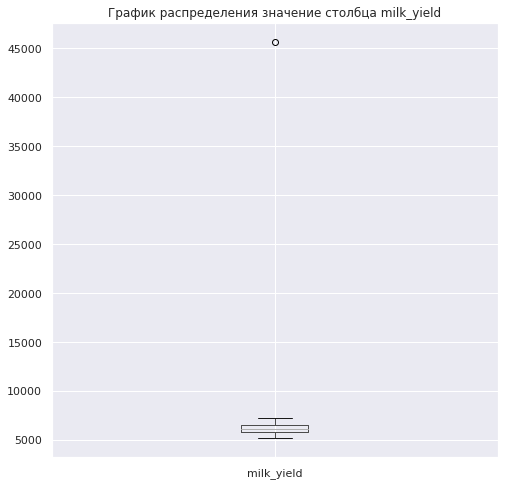

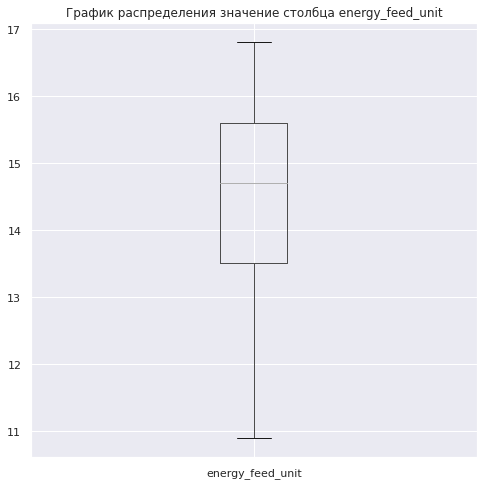

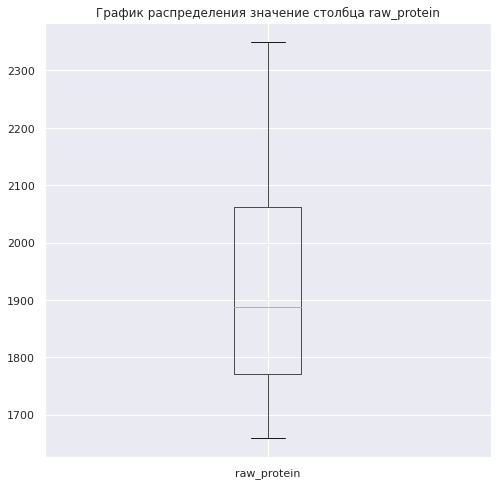

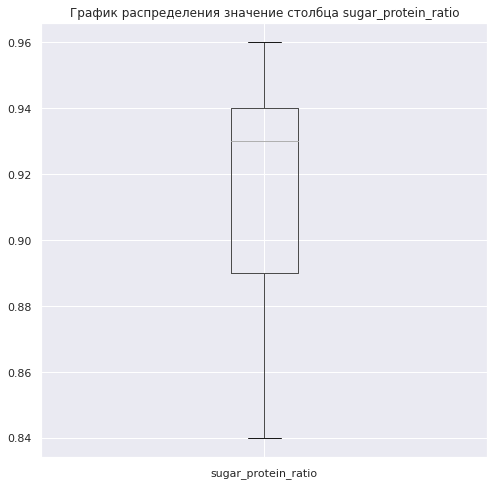

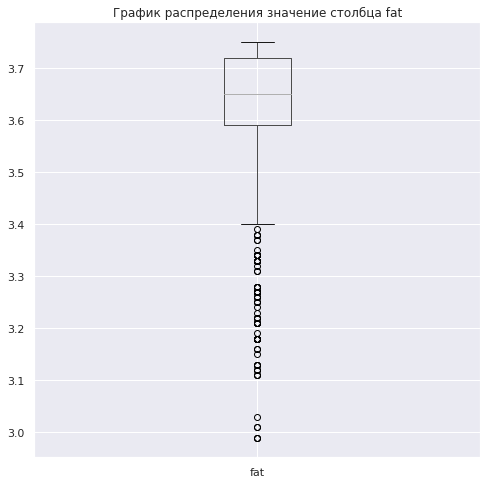

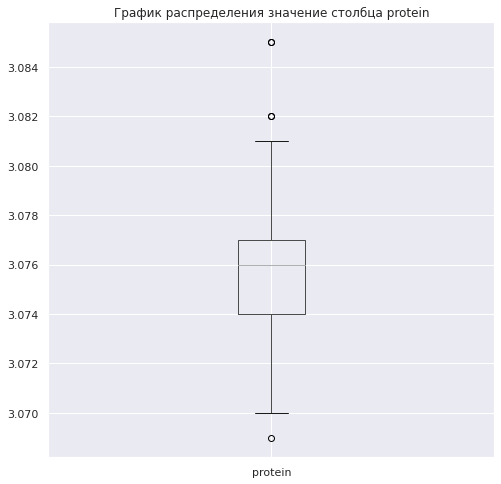

In [29]:
# построим boxplot для количественных переменных таблицы ferma_main
graph_box(ferma_main[['milk_yield', 'energy_feed_unit', 'raw_protein', 'sugar_protein_ratio', 'fat', 'protein']])

В столбце с удоем виден заметный выброс. Удалим строку с данным значением, так как этот выброс может сильно повлиять на дальнейшую работу.

In [30]:
ferma_main = ferma_main.query('milk_yield < 10000')

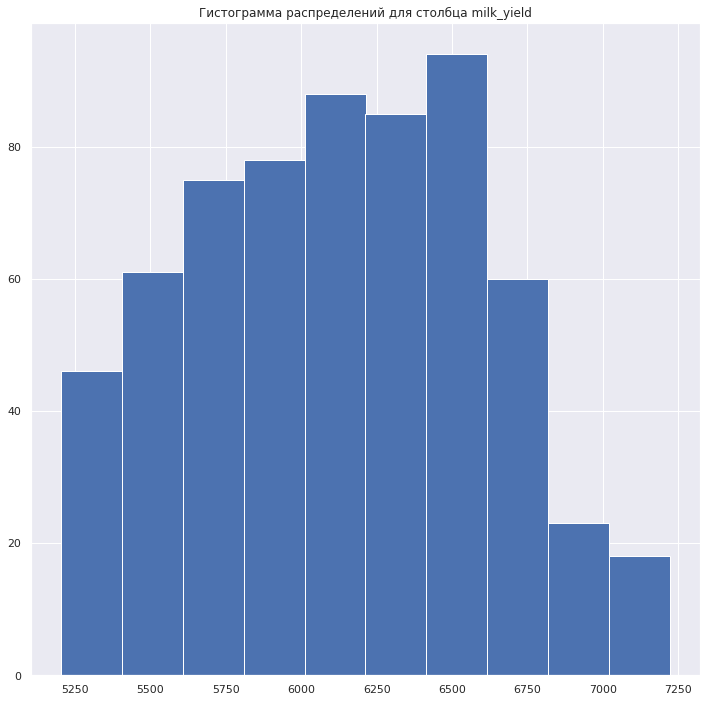

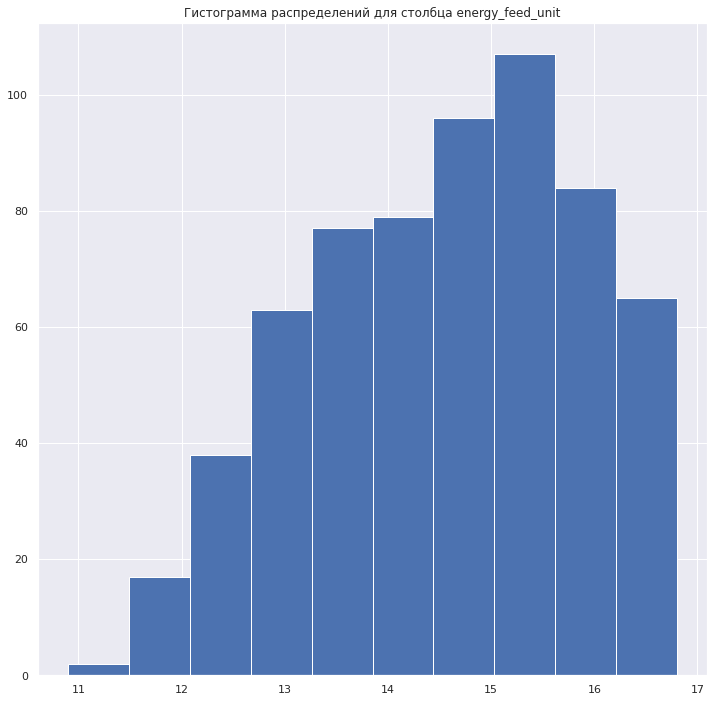

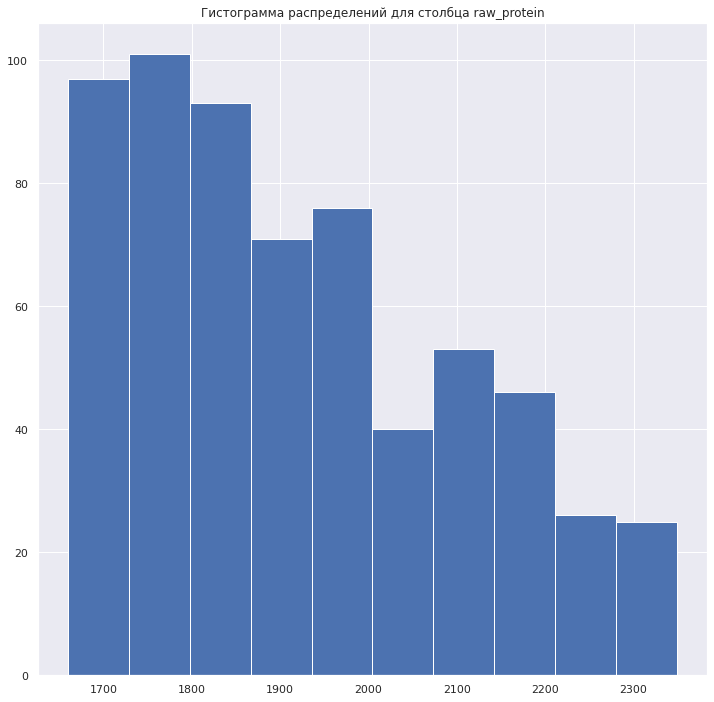

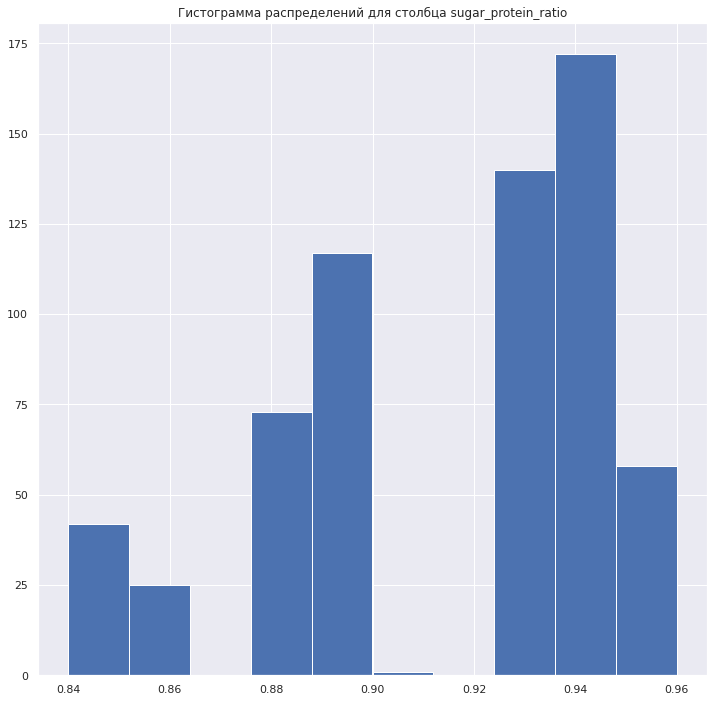

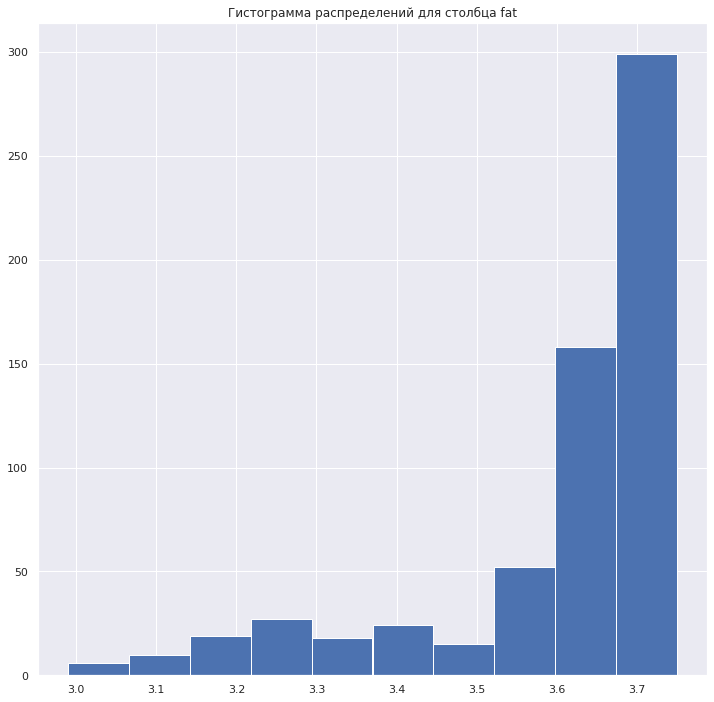

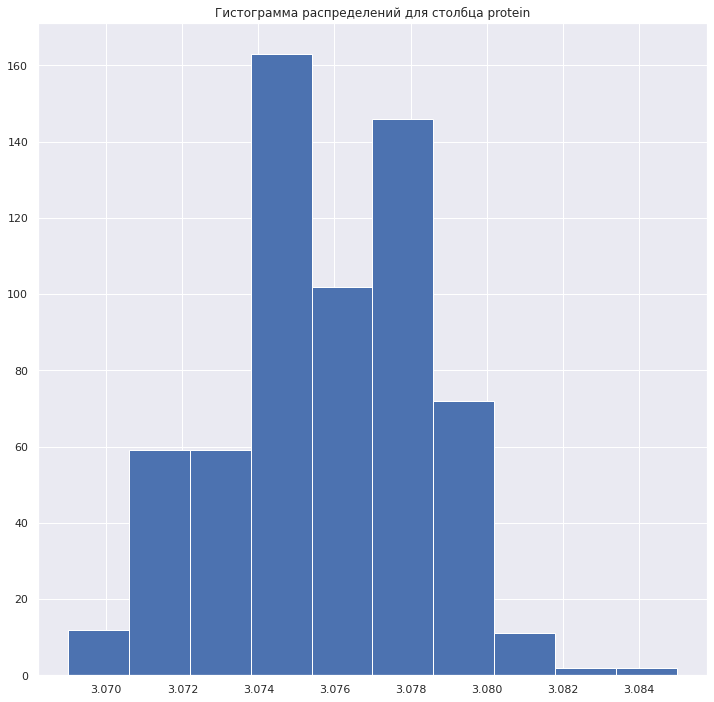

In [31]:
# посмотрим на распределение количественных признаков, построим гистограммы
graph_hist(ferma_main[['milk_yield', 'energy_feed_unit', 'raw_protein', 'sugar_protein_ratio', 'fat', 'protein']])

В целом, все количественные переменные распределены ненормально. Значит, в корреляционном анализе не будем использовать корреляцию Пирсона.

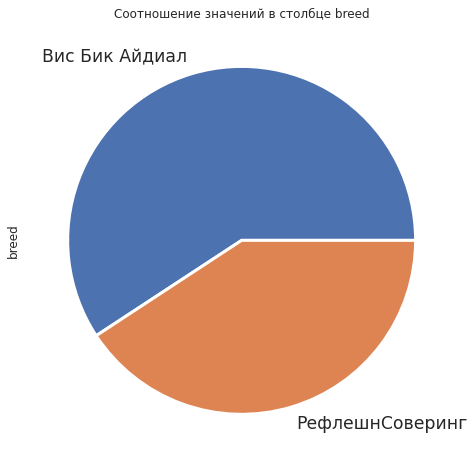

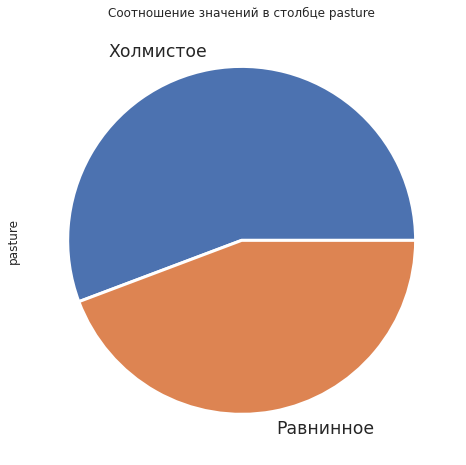

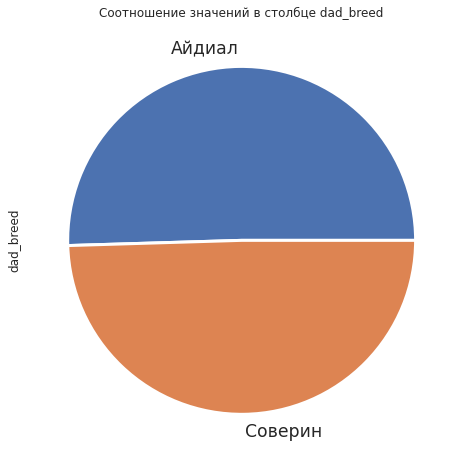

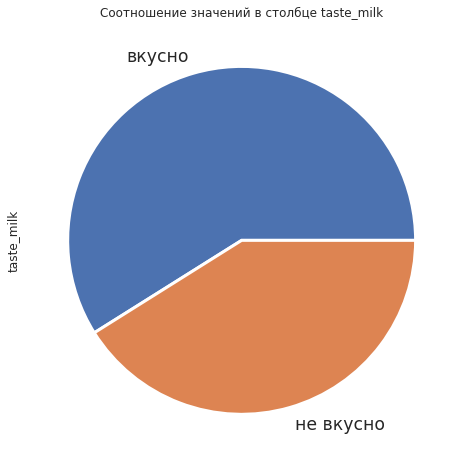

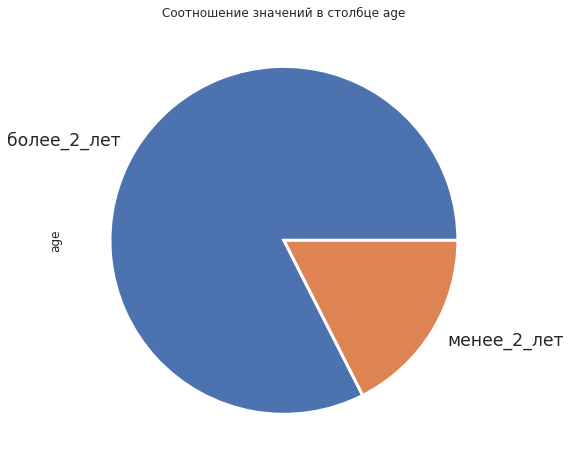

In [32]:
# построим графики для категориальных переменных
graph_pie(ferma_main[['breed', 'pasture', 'dad_breed', 'taste_milk', 'age']])

- В столбце с удоем был заметен выброс, он был удалён.
- В столбце с жирностью также много выбросов, но их решено оставить, так как отбрасывать такое количество данных нецелесообразно.
- Количественные признаки имеют ненормальное распределение.
- Категориальные данные распределены, в целом, равномерно, за исключением возраста коров - возрастных коров намного больше.

In [33]:
cow_buy.describe() # посмотрим на распределение значение в датасете ferma_dad

,fat,protein
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


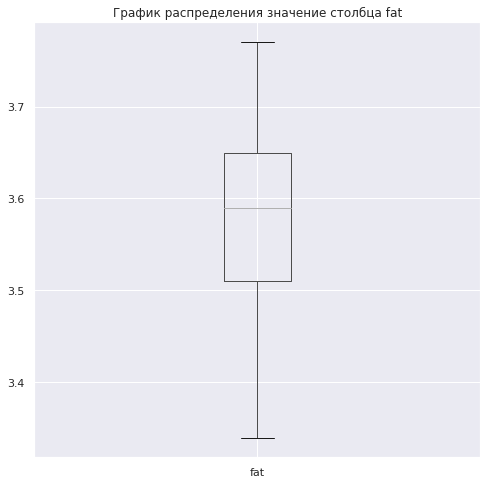

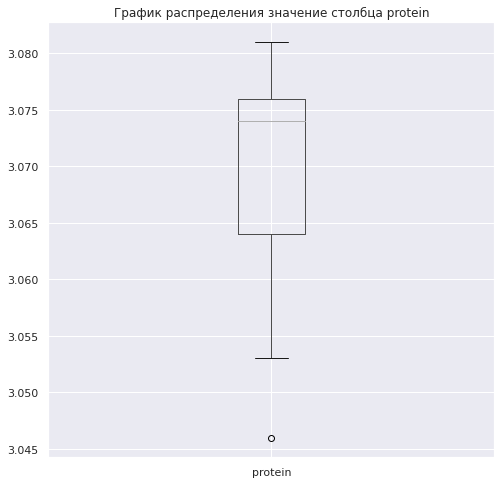

In [34]:
# построим ящик с усами для каждого количественного признака датасета cow_buy
graph_box(cow_buy[['fat', 'protein']])

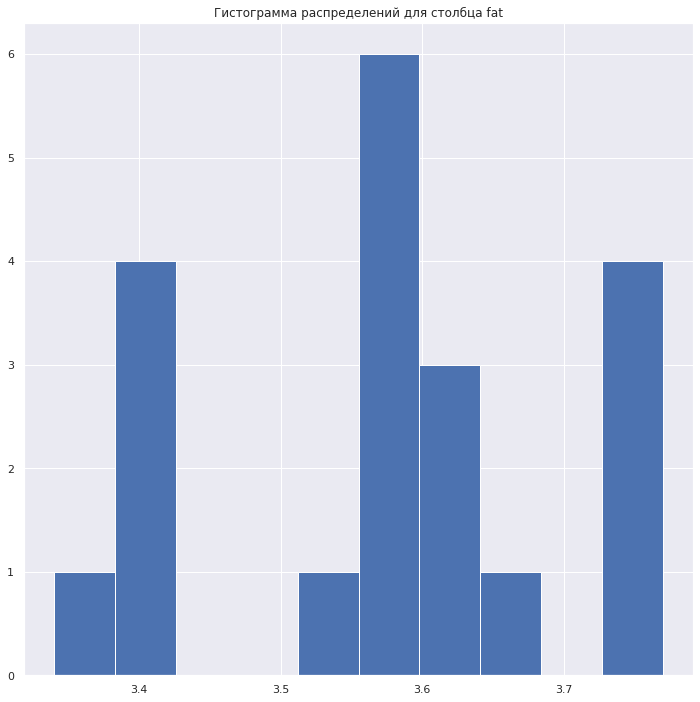

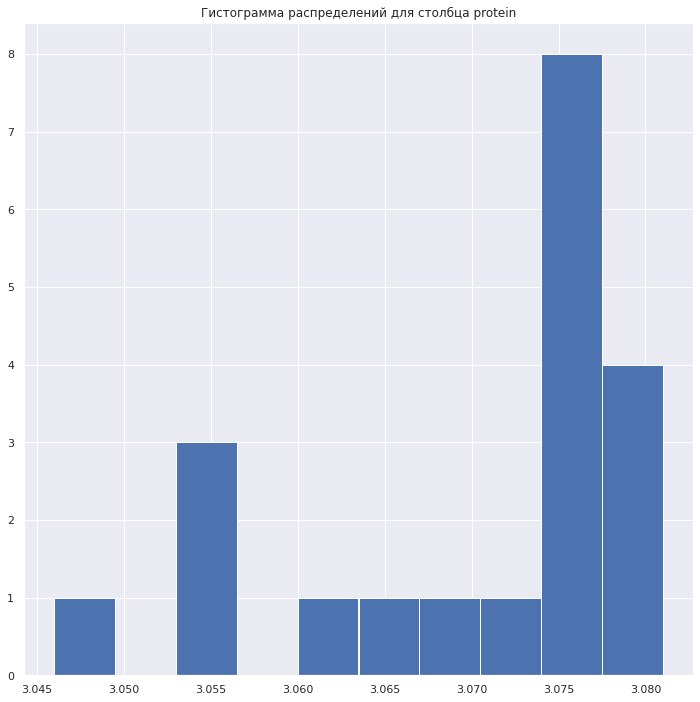

In [35]:
# построим гистограмму для каждого количественного признака датасета cow_buy
graph_hist(cow_buy[['fat', 'protein']])

В данной таблице количесвтенные значения также распределены ненормально. Выбросов, можно сказать, нет.

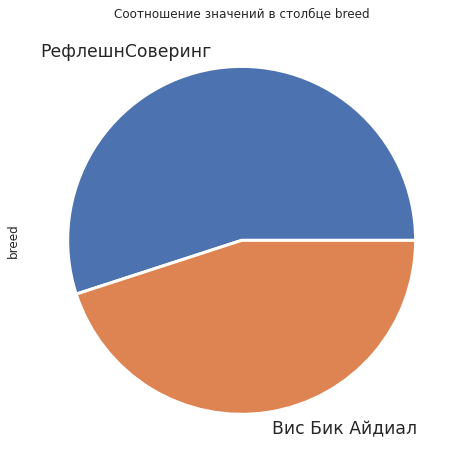

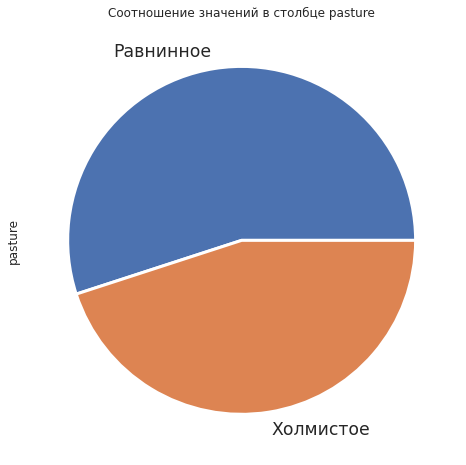

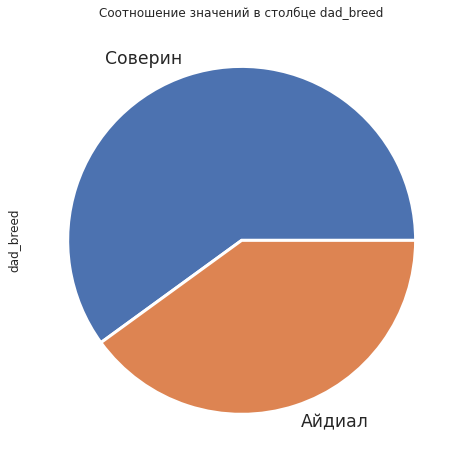

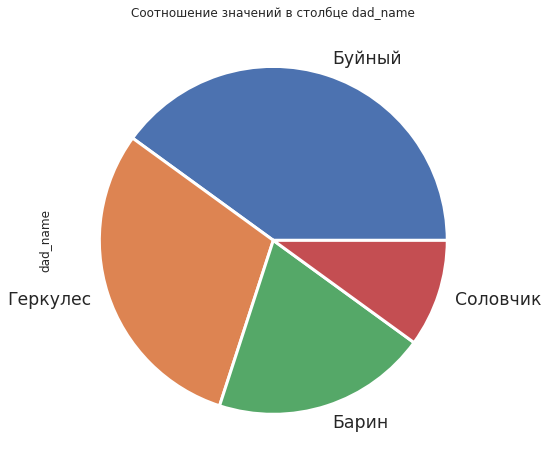

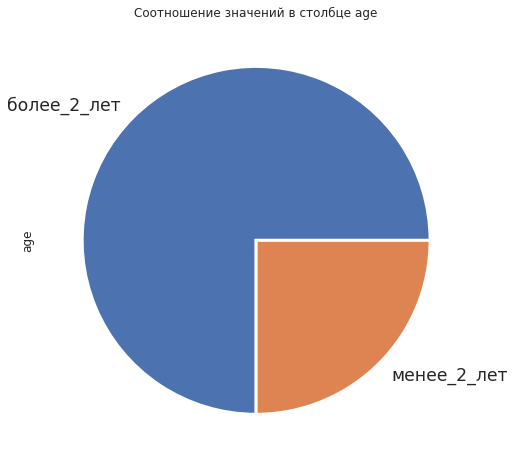

In [36]:
# теперь построим гистограммы для качественных признаков датасета cow_buy
graph_pie(cow_buy[['breed', 'pasture', 'dad_breed', 'dad_name', 'age']])

- В датасете cow_buy аномальных значений замечено не было. Данные похожи на правду.

### Вывод

ferma_main:
- В столбце с удоем был заметен выброс, он был удалён.
- В столбце с жирностью также много выбросов, но их решено оставить, так как отбрасывать такое количество данных нецелесообразно.
- Категориальные данные распределены, в целом, равномерно, за исключением возраста коров - возрастных коров намного больше.
- Количественные данные имеют ненормальное распределение. Это следует учесть при построении матрицы корреляций.

cow_buy:
- В датасете cow_buy аномальных значений замечено не было. Данные похожи на правду.
- Количественные данные также распределены ненормально.

## Корреляционный анализ

In [37]:
ferma_main.drop(['id'], axis=1).phik_matrix() 

interval columns not set, guessing: ['milk_yield', 'energy_feed_unit', 'raw_protein', 'sugar_protein_ratio', 'fat', 'protein']


,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture,dad_breed,fat,protein,taste_milk,age
milk_yield,1.000000,0.720719,0.463224,0.661359,0.164744,0.279540,0.519915,0.707654,0.058970,0.173122,0.998101
energy_feed_unit,0.720719,1.000000,0.456484,0.591190,0.123086,0.106758,0.171355,0.715914,0.000000,0.272265,0.771596
raw_protein,0.463224,0.456484,1.000000,0.387188,0.090925,0.096474,0.000000,0.397380,0.202474,0.176480,0.351685
sugar_protein_ratio,0.661359,0.591190,0.387188,1.000000,0.062660,0.155349,0.425601,0.645581,0.073787,0.572702,0.744410
breed,0.164744,0.123086,0.090925,0.062660,1.000000,0.213218,0.089330,0.222825,0.361851,0.000000,0.057295
pasture,0.279540,0.106758,0.096474,0.155349,0.213218,1.000000,0.000000,0.000000,0.099908,0.269063,0.128455
dad_breed,0.519915,0.171355,0.000000,0.425601,0.089330,0.000000,1.000000,0.000000,0.134582,0.000000,0.355817
fat,0.707654,0.715914,0.397380,0.645581,0.222825,0.000000,0.000000,1.000000,0.000000,0.198793,0.677913
protein,0.058970,0.000000,0.202474,0.073787,0.361851,0.099908,0.134582,0.000000,1.000000,0.143857,0.000000
taste_milk,0.173122,0.272265,0.176480,0.572702,0.000000,0.269063,0.000000,0.198793,0.143857,1.000000,0.165974


In [38]:
# рассчитаем коэффициенты корреляции между признаками в таблице ferma_main 
ferma_main.corr()

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,fat,protein
id,1.000000,-0.006816,-0.028600,-0.035613,-0.064803,0.017126,0.002547
milk_yield,-0.006816,1.000000,0.765098,0.446731,0.806339,0.600902,0.002966
energy_feed_unit,-0.028600,0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939
raw_protein,-0.035613,0.446731,0.387875,1.000000,0.446332,0.357793,0.226802
sugar_protein_ratio,-0.064803,0.806339,0.749007,0.446332,1.000000,0.629098,0.073718
fat,0.017126,0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542
protein,0.002547,0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000


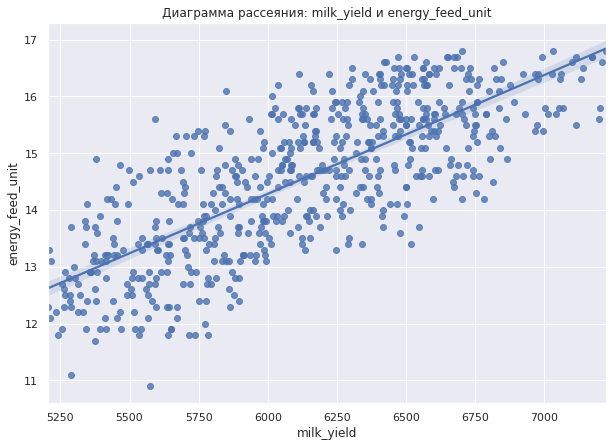

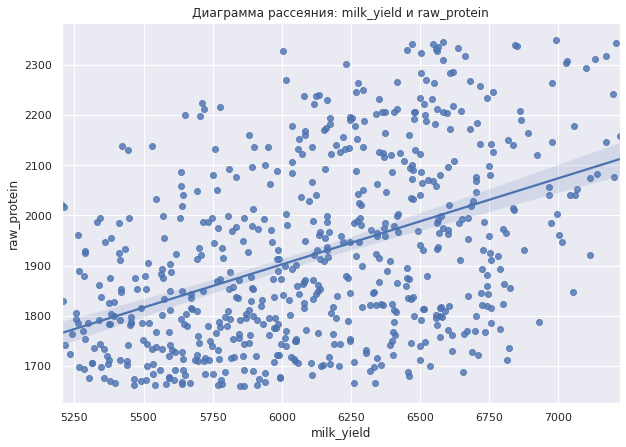

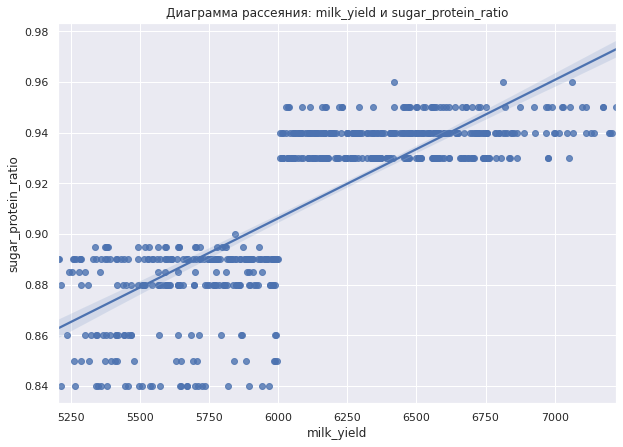

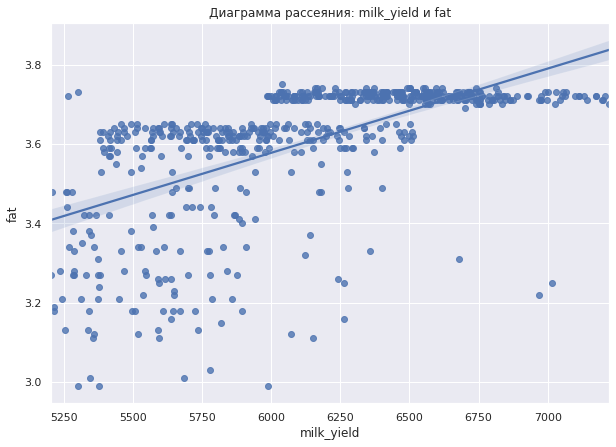

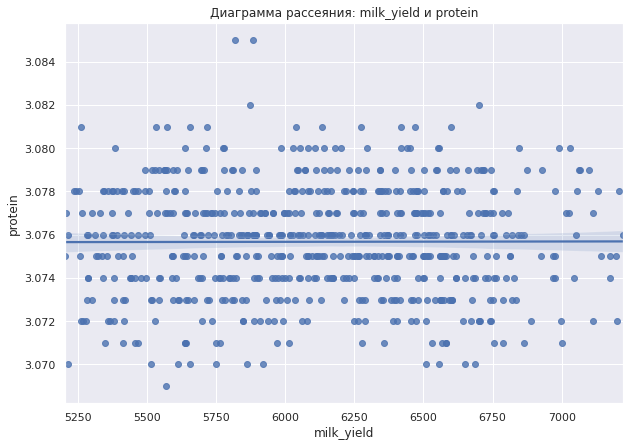

In [39]:
# построим графики распределения удоя от количественных признаков вне зависимости от категориальных переменных
for i in ferma_main[['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio', 'fat', 'protein']].columns:
    sns.regplot(x=ferma_main['milk_yield'], y=ferma_main[i])
    plt.title(f'Диаграмма рассеяния: milk_yield и {i}')
    plt.show()

- Можно заметить, что значение protein практически не корелирует с целевым признако, но его следует оставить, вероятно, связь с целевым нелинейная.
- Мультиколлинеарность не обнаружена (между целевыми признаками нет корреляции > 0.9).

In [40]:
# создадим функцию для построения графиков распределения с учетом категориальных переменных
def scatter(df, col ,cat):
    fig, axs = plt.subplots(3, 2, figsize = (20, 20))
    for i, col in enumerate(col):
        axs[(i//2), (i%2)].set_title(f'График распределения удоя от {col} по {cat}')
        sns.scatterplot(data=df, x=col, y='milk_yield', hue=cat, alpha=0.75, ax=axs[(i//2), (i%2)]);
        axs[(i//2), (i%2)].set_xlabel(col)
        axs[(i//2), (i%2)].set_ylabel('milk_yield')
    plt.show()

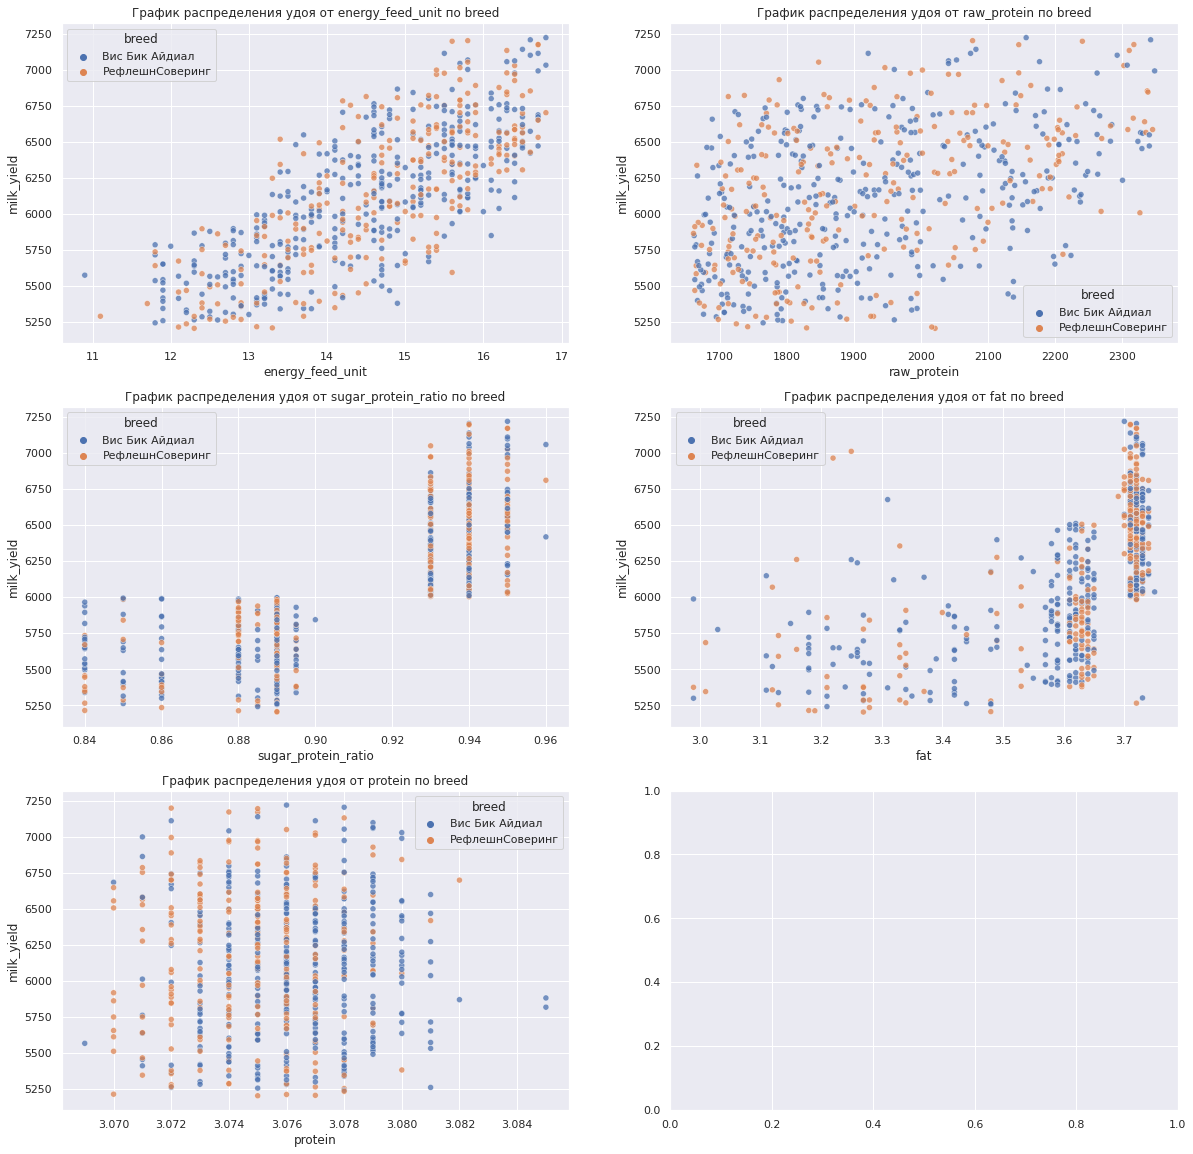

In [41]:
# зависимость удоя от породы
scatter(ferma_main, ['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio', 'fat', 'protein'], 'breed')

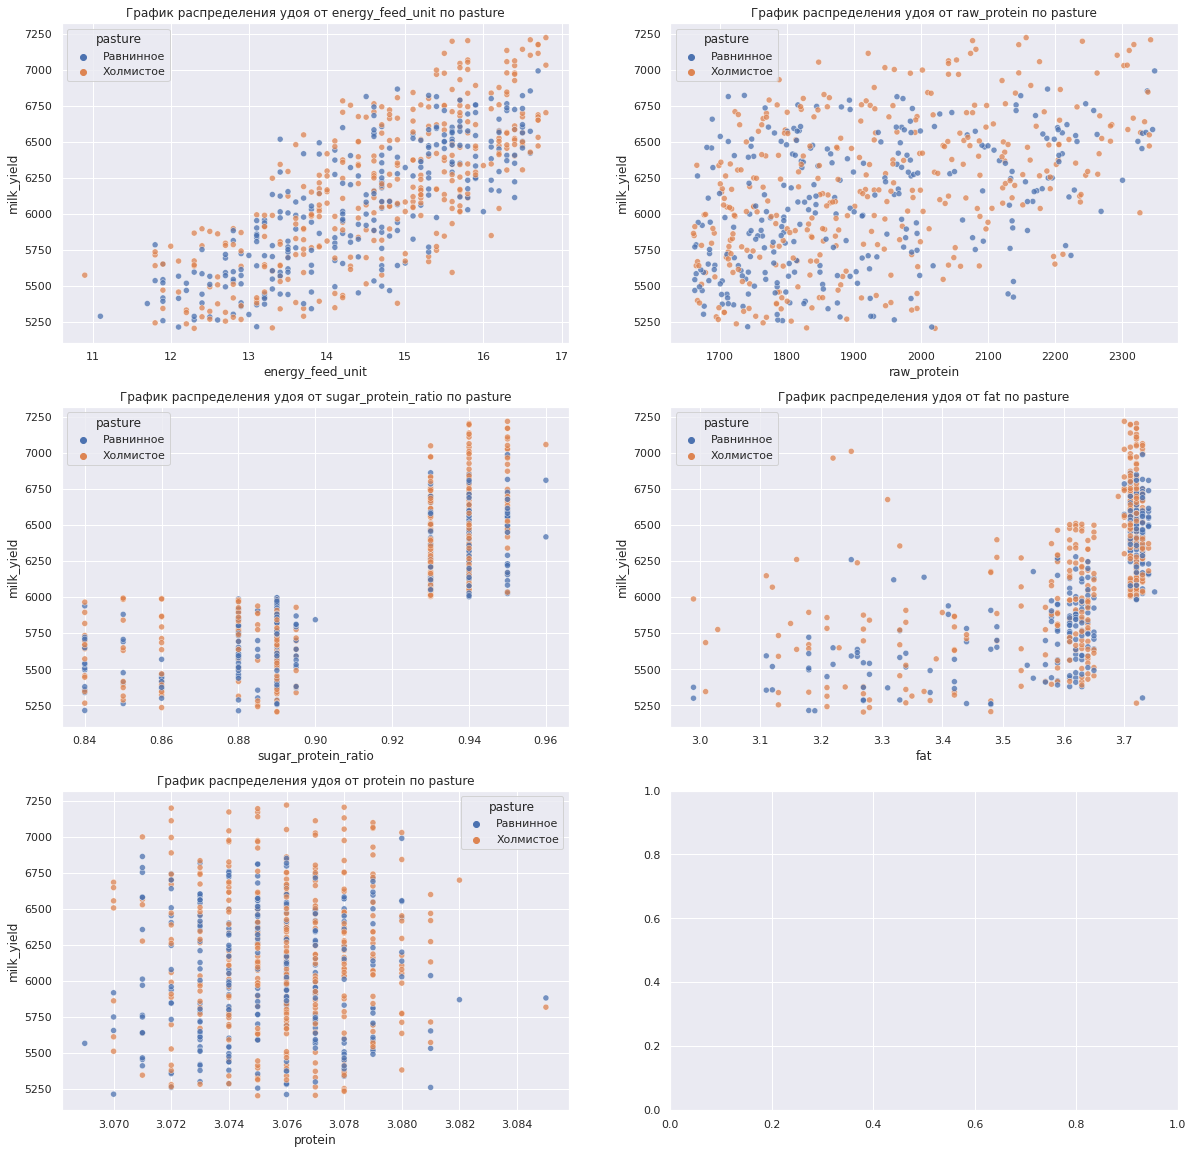

In [42]:
# зависимость удоя от пастбища
scatter(ferma_main, ['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio', 'fat', 'protein'], 'pasture')   

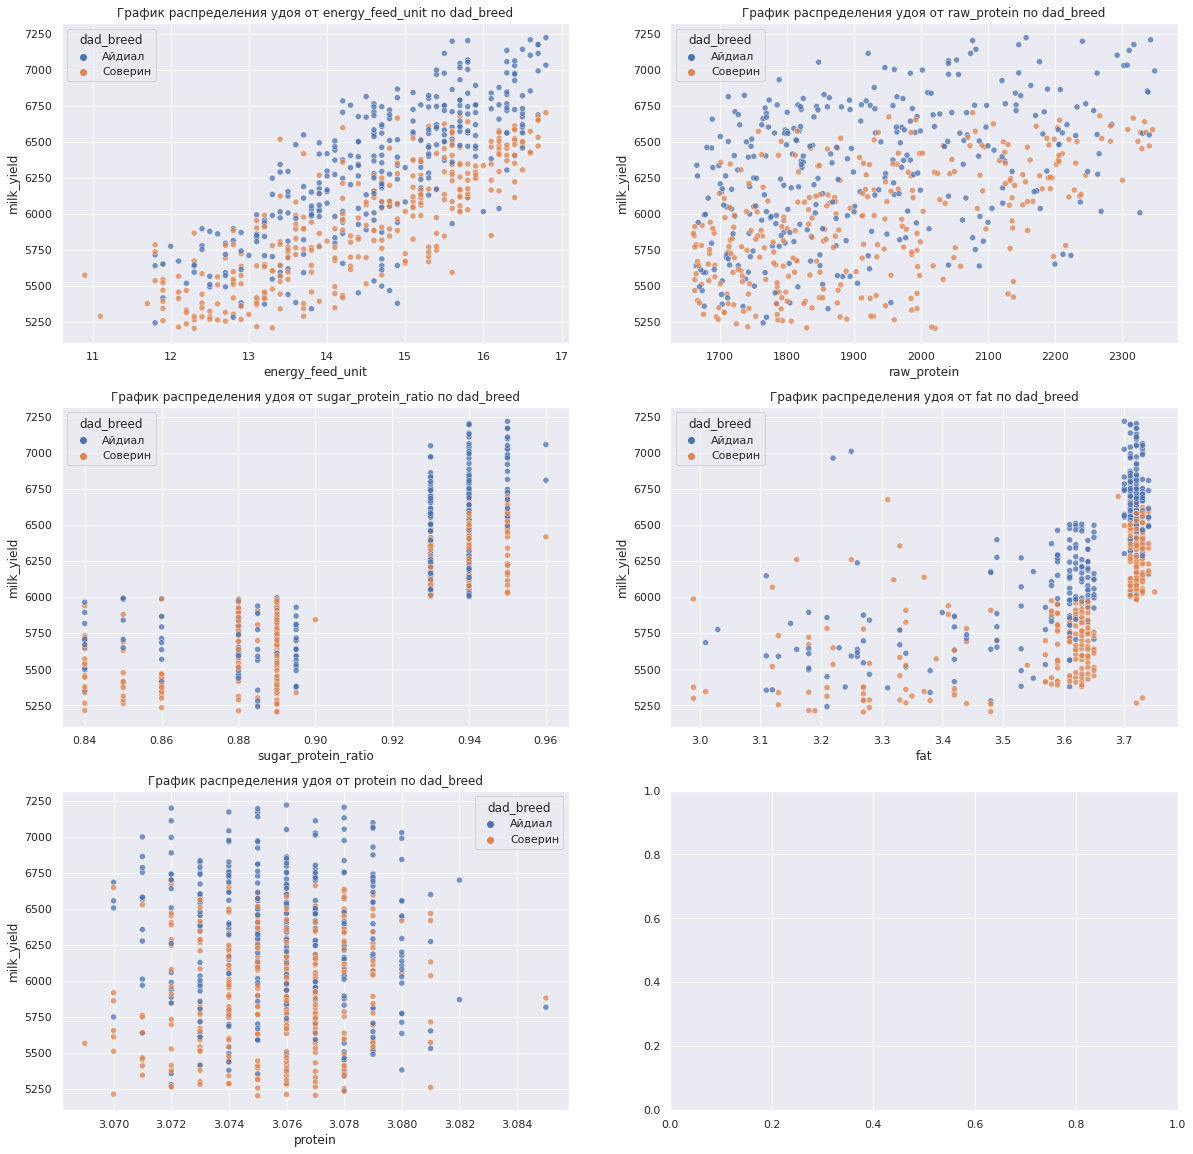

In [43]:
# зависимость удоя от папы коровы
scatter(ferma_main, ['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio', 'fat', 'protein'], 'dad_breed')

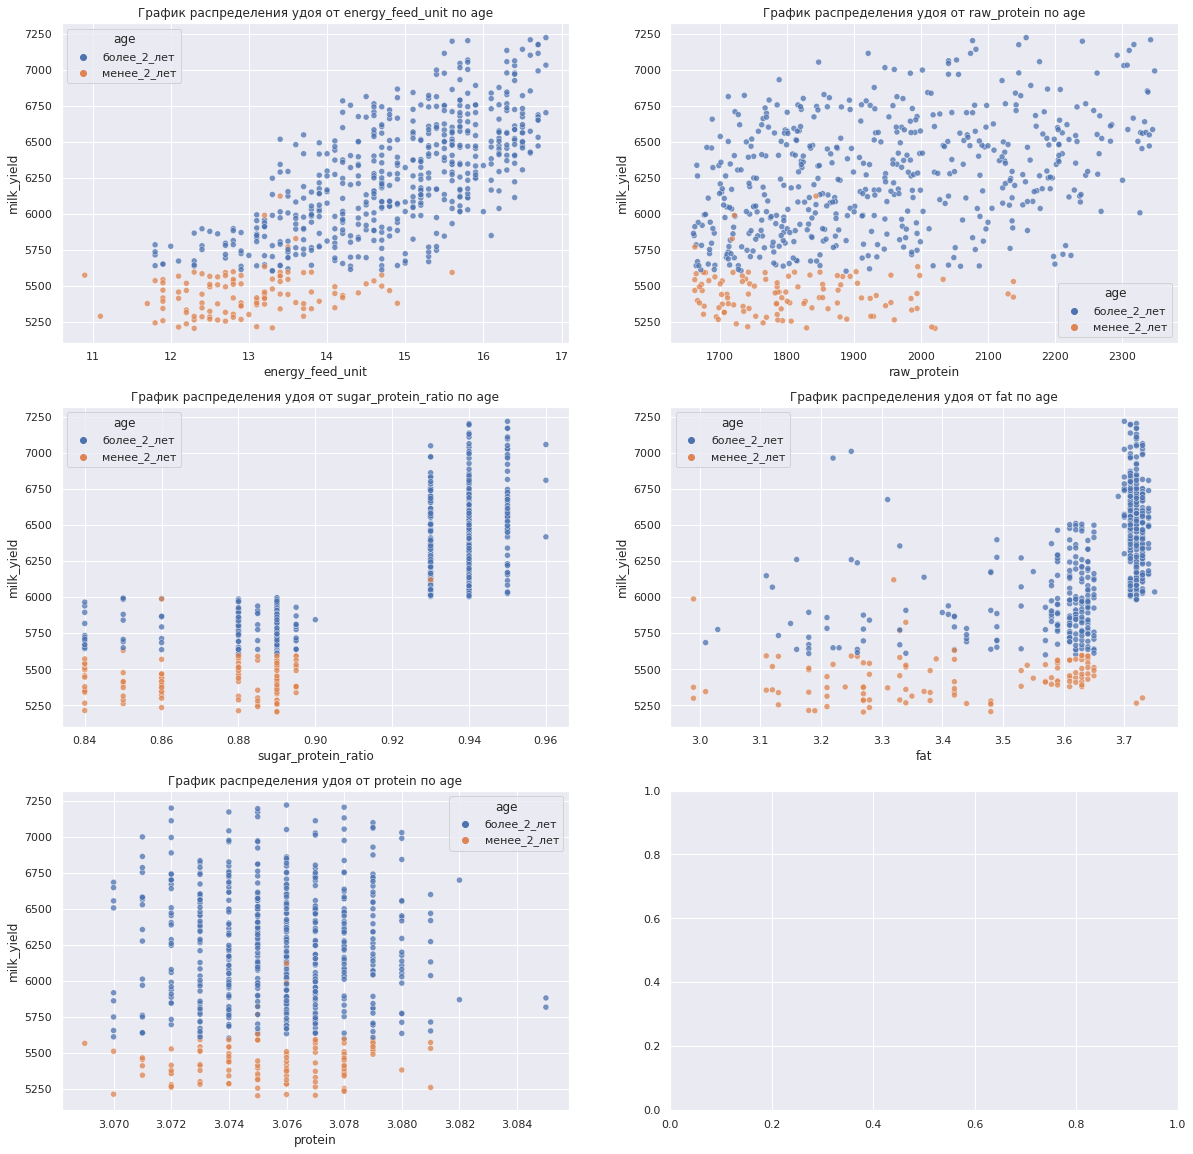

In [44]:
# зависимость удоя от возраста коровы
scatter(ferma_main, ['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio', 'fat', 'protein'], 'age')

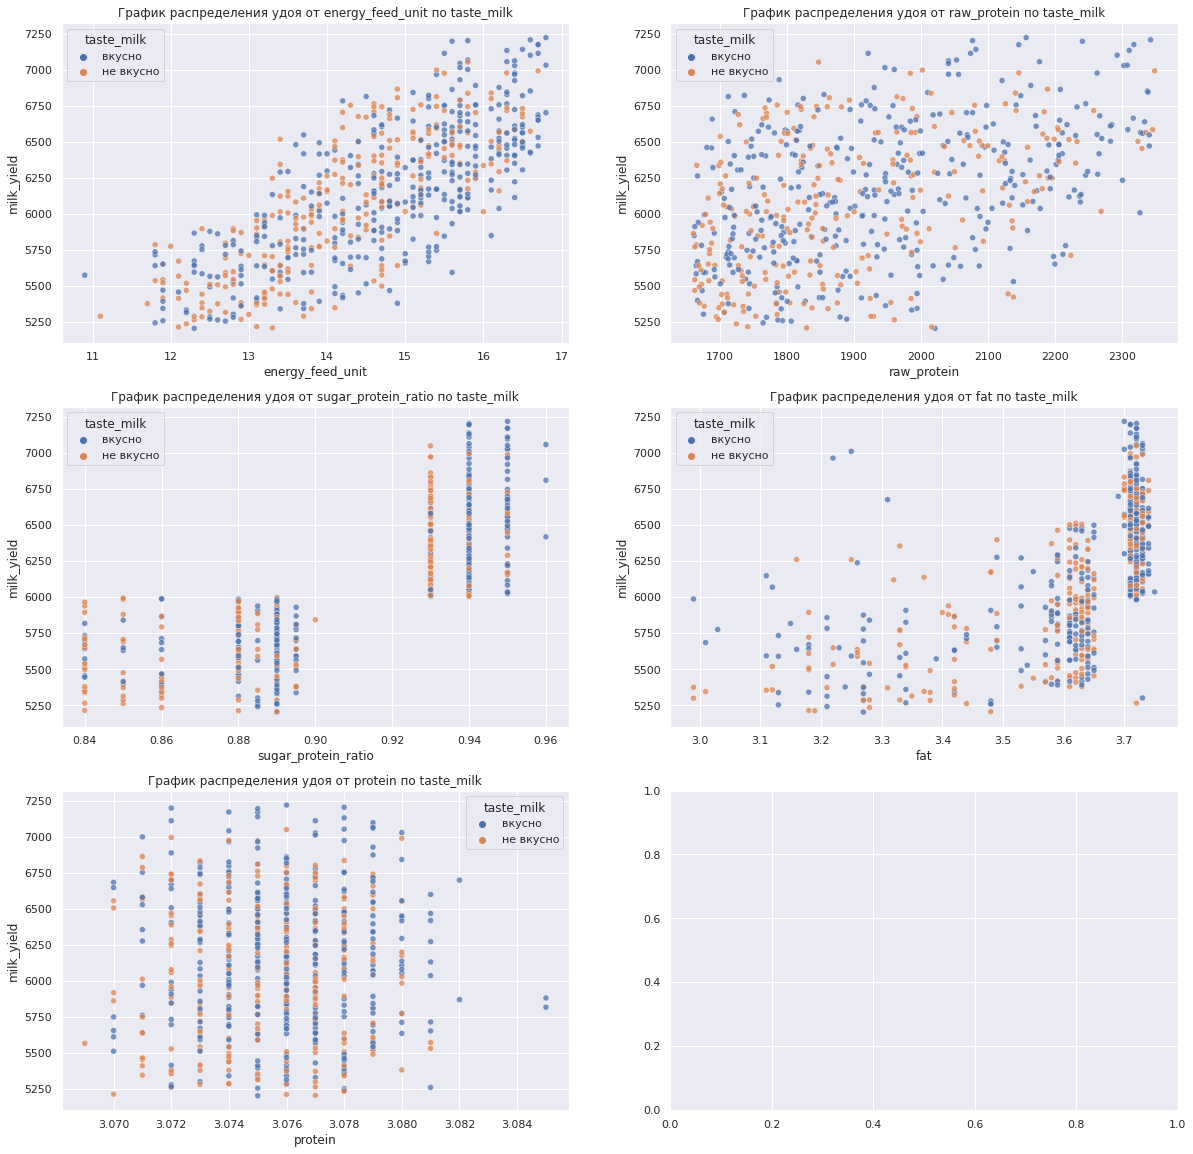

In [45]:
# зависимость удоя от вкуса молока
scatter(ferma_main, ['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio', 'fat', 'protein'], 'taste_milk')

- Связь признаков не выраженная.
- Возраст коровы хоро коррелирует с удоем. 
- Целевой признак при учете данных переменных распределен равномерно, что нельзя сказать о породе папы и возрасте коровы. 
- Скорее всего, от папы зависят наследственные данных, а от возраста - насколько развился организм животного.

### Вывод

- Можно заметить, что значение protein практически не корелирует с целевым признаком (удой), но его все равно будем использовать в модели МО, так как связь может быть нелинейной.
- Мультиколлинеарность не обнаружена (между целевыми признаками нет корреляции > 0.9).
- Связь количественных признаков не выраженная.
- Возраст коровы хоро коррелирует с удоем. 
- Целевой признак при учете данных переменных распределен равномерно, что нельзя сказать о породе папы и возрасте коровы. 
- Скорее всего, от папы зависят наследственные данных, а от возраста - насколько развился организм животного.


## Обучение модели линейной регрессии

### 1. Первая модель линейной регрессии

In [46]:
# подготовим таблицу для первой модели
# на удой влияют характеристики корма, пастбища
# характеристики молока не влияют на удой
ferma1 = ferma_main.drop(['id', 'protein', 'fat', 'taste_milk'], axis=1)
ferma1.head() # проверим

,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture,dad_breed,age
0,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет


In [47]:
# поделим выборку на входные и целевой признаки
X = ferma1.drop(['milk_yield'], axis=1)
y = ferma1['milk_yield']

In [48]:
# разделдим данные на тренировочные и тестовые выборки
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [49]:
# выбор всех категориальных признаков
cat = ['dad_breed', 'age', 'pasture', 'breed']

In [50]:
# кодируем качественные переменные
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat])
X_test_ohe = encoder.transform(X_test[cat])

encoder_col_names = encoder.get_feature_names() # сохраним названия новых столбцов

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder.get_feature_names())
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder.get_feature_names())

In [51]:
# выбираем количественные данные
num = ['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio']

In [52]:
# масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler. fit_transform(X_train[num])
X_test_scaled = scaler.transform(X_test[num])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num)

In [53]:
# создадим окончательные выборки
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [54]:
# создадим модель МО
model_lr  = LinearRegression()

# обучим её
model_lr.fit(X_train, y_train)

# получим предсказания на тестовой выборке
predictions = model_lr.predict(X_test)

In [55]:
# рассчитаем R^2 для модели
r2 = r2_score(y_test, predictions) 
r2

0.7844078173416967

Модель не ошибается в предсказаниях в 78% случаев. Есть куда улучшать модель.

Посмотрим на анализ остатков.

In [56]:
# посчитаем остатки
res = y_test - predictions

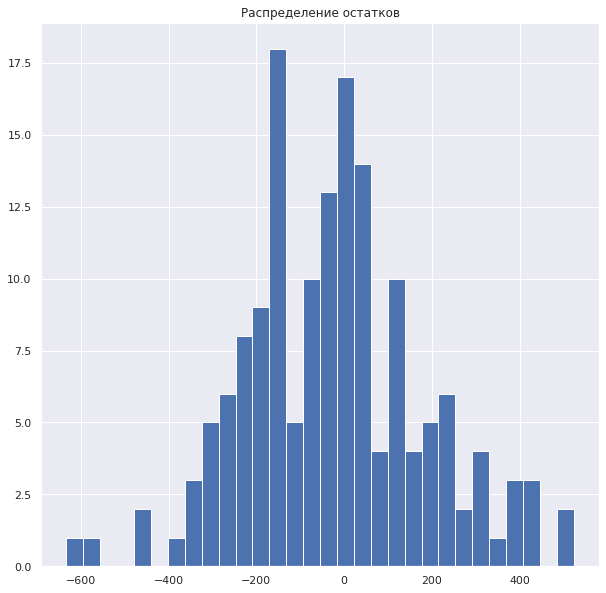

In [57]:
# построим график распределения остатков
res.hist(bins=30, figsize=(10,10))
plt.title('Распределение остатков')
plt.show()

Остатки распределены имеют ненормальное распределение. Есть выбросы, как в одну, так и в другую стороны.

Теперь посмотрим на устойчивость остатков модели.

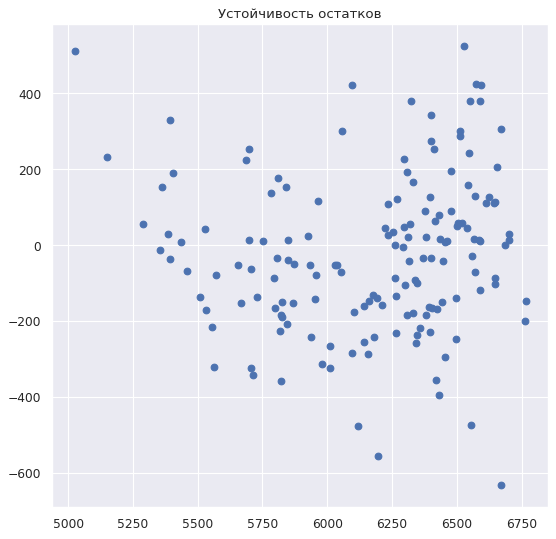

In [58]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x=predictions, y=res)
plt.title('Устойчивость остатков')
plt.show()

- Наблюдается непостоянство остатков.
- Видно, что разница между минимумом и максимумом остатков при разных прогнозных значениях модели меняется.
- Есть уверенность, что модель может ошибаться и давать неверные предсказания, ведь устойчивость остатков очень важна.
- Модель чаще ошибается в случаях, когда истинное значение удоя высокое.
- Посмотрим на остальные метрики: MSE, MAE, RMSE.

In [59]:
# рассчитаем MAE для данной модели
mae1 = mean_absolute_error(y_test, predictions)

print(f'МАЕ для 1-й модели равно {mae1}. В среднем  модель отклоняется от истинного значения признака на {mae1} литров.')

МАЕ для 1-й модели равно 164.24194463474925. В среднем  модель отклоняется от истинного значения признака на 164.24194463474925 литров.


In [60]:
# рассчитаем MSE для данной модели
mse1 = mean_squared_error(y_test, predictions)

print(f'Среднеквадратичная ошибка первой модели равна {mse1}')

Среднеквадратичная ошибка первой модели равна 43887.015009660514


In [61]:
# рассчитаем RMSE
rmse1 = mean_squared_error(y_test, predictions, squared=False) 

print(f'Корень из среднеквадратичной ошибки первой модели равна {rmse1}')

Корень из среднеквадратичной ошибки первой модели равна 209.4922791170608


### 2. Вторая модель линейной регрессии.

По графикам рассеяния можно заметить, что СПО-Удой и ЭКЕ-Удой связаны нелинейно.

Для устранения нелинейнойсти:
- Преобразуем СПО в бинарный признак: > 0.91 и < 0.91.
- Вместо ЭКЕ введем ЭКЕ в квадрате, чтобы избавиться от закругления на диаграмме рассеяния.

In [62]:
# подготовим данные для второй модели
ferma2 = ferma1
ferma2.head() # проверим

,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture,dad_breed,age
0,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет


In [63]:
# устраним нелинейность между удоем и эке, введя эке в квадрате
ferma2['energy_feed_unit'] = ferma2['energy_feed_unit'] ** 2

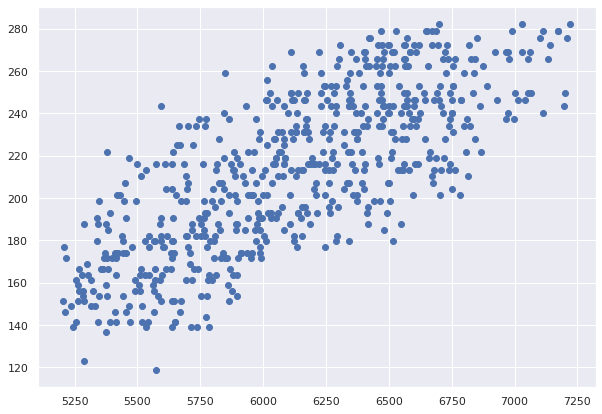

In [64]:
# посмотрим на scatter после изменений
plt.scatter(x=ferma2['milk_yield'], y=ferma2['energy_feed_unit'])
plt.show()

In [65]:
# теперь переведем в бинарный признак СПО
ferma2['sugar_protein_ratio'] = np.where(ferma2['sugar_protein_ratio']>0.91, 'Высокое СПО', 'Низкое СПО')

In [66]:
# проверим
ferma2.head(10)

,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture,dad_breed,age
0,5863,201.64,1743,Низкое СПО,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,5529,163.84,2138,Низкое СПО,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,5810,196.00,1854,Низкое СПО,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,5895,153.76,2012,Низкое СПО,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,5302,163.84,1675,Низкое СПО,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
5,5254,161.29,1806,Низкое СПО,РефлешнСоверинг,Холмистое,Соверин,менее_2_лет
6,5910,174.24,1792,Низкое СПО,Вис Бик Айдиал,Равнинное,Соверин,более_2_лет
7,6179,216.09,1806,Высокое СПО,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
8,6783,201.64,1918,Высокое СПО,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
9,5339,179.56,1791,Низкое СПО,Вис Бик Айдиал,Холмистое,Соверин,менее_2_лет


In [67]:
# разделим данные на входные и целевой признаки
X = ferma2.drop(['milk_yield'], axis=1)
y = ferma2['milk_yield']

In [68]:
# разделдим данные на тренировочные и тестовые выборки
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [69]:
# категориальные признаки
cat = ['dad_breed', 'age', 'sugar_protein_ratio', 'breed', 'pasture']

In [70]:
# кодируем качественные переменные
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat])
X_test_ohe = encoder.transform(X_test[cat])

encoder_col_names = encoder.get_feature_names() # сохраним названия новых столбцов

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder.get_feature_names())
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder.get_feature_names())

In [71]:
# выбираем количественные данные
num = ['energy_feed_unit', 'raw_protein']

In [72]:
# масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler. fit_transform(X_train[num])
X_test_scaled = scaler.transform(X_test[num])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num)

In [73]:
# создадим окончательные выборки
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [74]:
# создадим модель МО
model_lr2  = LinearRegression()

# обучим её
model_lr2.fit(X_train, y_train)

# получим предсказания на тестовой выборке
predictions2 = model_lr2.predict(X_test)

In [75]:
# рассчитаем R^2 для модели
r2 = r2_score(y_test, predictions2) 
r2

0.8180879926867504

Обощающая способность модели выросла с 78% до 81%. 

Проведем анализ остатков.

In [76]:
# посчитаем остатки
res = y_test - predictions2

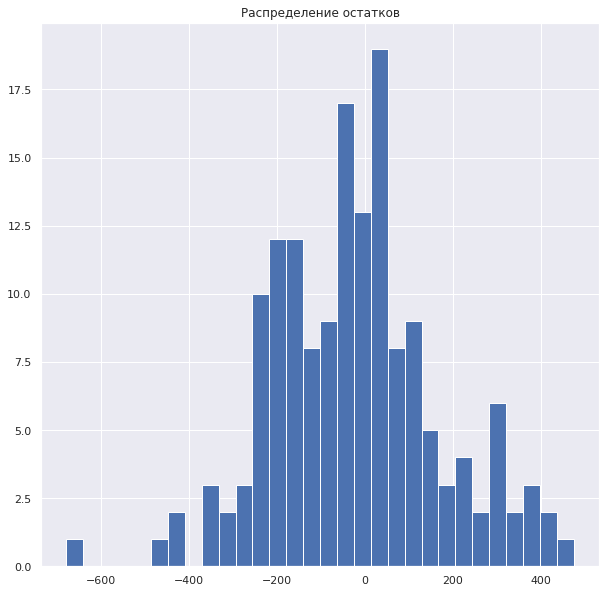

In [77]:
# построим график распределения остатков
res.hist(bins=30, figsize=(10,10))
plt.title('Распределение остатков')
plt.show()

Судя по графику, распределение более менее похоже на нормальное. Выбросы также имеются, но меньше (в левую сторону).

Далее посмотрим на устойчивость остатков.

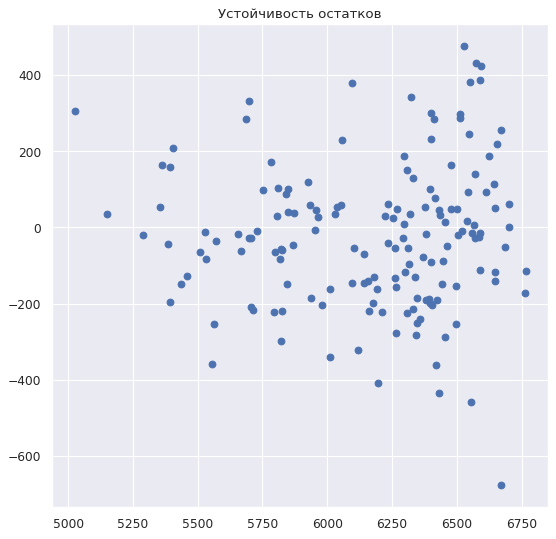

In [78]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x=predictions, y=res)
plt.title('Устойчивость остатков')
plt.show()

Сразу видно, что дисперсия непостоянна. Модель будет делать неверные прогнозы. 

Посмотрим на остальные метрики: MSE, MAE, RMSE.

In [79]:
# рассчитаем MAE для данной модели
mae2 = mean_absolute_error(y_test, predictions2) 

print(f'МАЕ для 2-й модели равно {mae2}. В среднем  модель отклоняется от истинного значения признака на {mae2} литров.')

МАЕ для 2-й модели равно 149.03965222364596. В среднем  модель отклоняется от истинного значения признака на 149.03965222364596 литров.


In [80]:
# рассчитаем MSE для данной модели
mse2 = mean_squared_error(y_test, predictions2)

print(f'Среднеквадратичная ошибка второй модели равна {mse2}')

Среднеквадратичная ошибка второй модели равна 37030.91131113693


In [81]:
# рассчитаем RMSE
rmse2 = mean_squared_error(y_test, predictions2, squared=False) 

print(f'Корень из среднеквадратичной ошибки второй модели равна {rmse2}')

Корень из среднеквадратичной ошибки второй модели равна 192.43417396901447


### 3. Третья модель линейной регрессии

In [82]:
# подготовим данные для третьей модели
ferma3 = ferma2
ferma3.head() # проверим

,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture,dad_breed,age
0,5863,201.64,1743,Низкое СПО,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,5529,163.84,2138,Низкое СПО,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,5810,196.00,1854,Низкое СПО,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,5895,153.76,2012,Низкое СПО,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,5302,163.84,1675,Низкое СПО,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет


In [83]:
# добавим признак имя папы из таблицы ferma_dad
ferma3 = ferma3.join(ferma_dad.drop(['id'], axis=1))
 
ferma3.head() # проверим

,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture,dad_breed,age,dad_name
0,5863,201.64,1743,Низкое СПО,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный
1,5529,163.84,2138,Низкое СПО,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Соловчик
2,5810,196.00,1854,Низкое СПО,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,Барин
3,5895,153.76,2012,Низкое СПО,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,Буйный
4,5302,163.84,1675,Низкое СПО,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Барин


In [84]:
# разделим данные на входные и целевой признаки
X = ferma3.drop(['milk_yield'], axis=1)
y = ferma3['milk_yield']

In [85]:
# разделим данные на тренировочные и тестовые выборки
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [86]:
# категориальные признаки
cat = ['dad_breed', 'age', 'sugar_protein_ratio', 'breed', 'pasture', 'dad_name']

In [87]:
# кодируем качественные переменные
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat])
X_test_ohe = encoder.transform(X_test[cat])

encoder_col_names = encoder.get_feature_names() # сохраним названия новых столбцов

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder.get_feature_names())
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder.get_feature_names())

In [88]:
# выбираем количественные данные
num = ['energy_feed_unit', 'raw_protein']

In [89]:
# масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler. fit_transform(X_train[num])
X_test_scaled = scaler.transform(X_test[num])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num)

In [90]:
# создадим окончательные выборки
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [91]:
# создадим модель МО
model_lr3  = LinearRegression()

# обучим её
model_lr3.fit(X_train, y_train)

# получим предсказания на тестовой выборке
predictions3 = model_lr3.predict(X_test)

In [92]:
# рассчитаем R^2 для модели
r2 = r2_score(y_test, predictions3) 
r2

0.8247542745210403

Из всех моделей обобщающая способность 3-й модели самая высокая.

Проведём анализ остатков.

In [93]:
# посчитаем остатки
res = y_test - predictions2

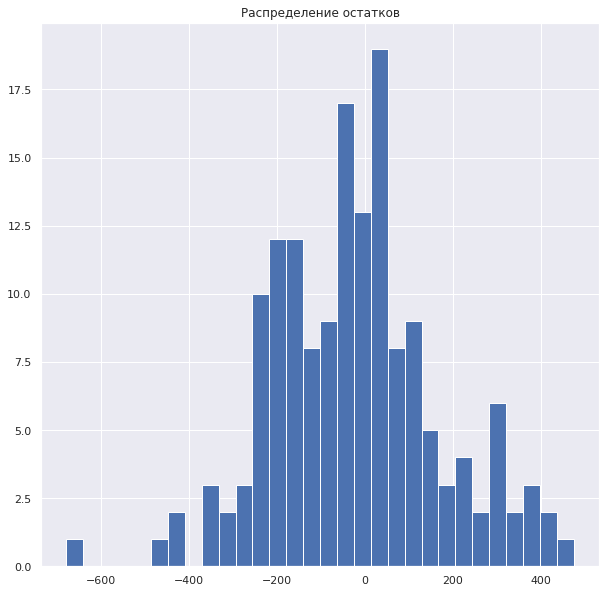

In [94]:
# построим график распределения остатков
res.hist(bins=30, figsize=(10,10))
plt.title('Распределение остатков')
plt.show()

Выбросы есть, распределение более менее похоже на нормальное.

Посмотрим на устойчивость.

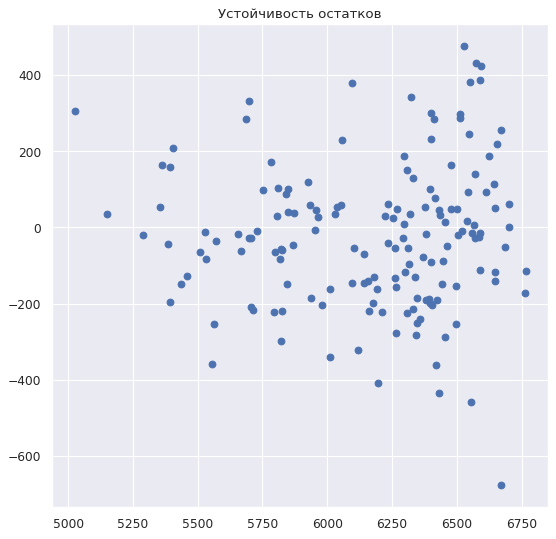

In [95]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x=predictions, y=res)
plt.title('Устойчивость остатков')
plt.show()

Остатки все также неустойчивы. 

Посмотрим на остальные метрики: MSE, MAE, RMSE.

In [96]:
# рассчитаем MAE для данной модели
mae3 = mean_absolute_error(y_test, predictions3) 

print(f'МАЕ для 3-й модели равно {mae3}. В среднем  модель отклоняется от истинного значения признака на {mae3} литров.')

МАЕ для 3-й модели равно 146.1630244536233. В среднем  модель отклоняется от истинного значения признака на 146.1630244536233 литров.


In [97]:
# рассчитаем MSE для данной модели
mse3 = mean_squared_error(y_test, predictions3)

print(f'Среднеквадратичная ошибка третьей модели равна {mse3}')

Среднеквадратичная ошибка третьей модели равна 35673.88988618199


In [98]:
# рассчитаем RMSE
rmse3 = mean_squared_error(y_test, predictions3, squared=False) 

print(f'Корень из среднеквадратичной ошибки третьей модели равна {rmse3}')

Корень из среднеквадратичной ошибки третьей модели равна 188.87532895055932


In [99]:
print(mae1, mse1, rmse1)

print(mae2, mse2, rmse2)

print(mae3, mse3, rmse3)

164.24194463474925 43887.015009660514 209.4922791170608
149.03965222364596 37030.91131113693 192.43417396901447
146.1630244536233 35673.88988618199 188.87532895055932


### 4. Сравнение трёх моделей.

Сраним три модели между собой. Для начала сопоставим R2 и остатки:
- Обощающая способность (R2) у 3-й модели самая высокая - она делает верные предсказания в 82% случаях.
- У второй модели R2 - 0.8, у первой модели - 0.78.
- Анализ остатков показал, что у двух последних моделей остатки имеют нормальное распределение.
- Устойчивость остатков везде оставляет желать лучшего, у всех трёх моделей она примерно равна.
- У 2-й и 3-й модели распределение остатков немного отклоняется влево (модель немного завышает предсказания).

Теперь посмотрим на другие метрики.

МАЕ (то, насколько прогнозы модели в среднем отклоняются от истинного значения):
- Первая модель - 164.2 л
- Вторая модель - 149.0 л
- Третья модель - 146.1 л

MSE (среднеквадратичная ошибка):
- Первая модель - 43887
- Вторая модель - 37030
- Третья модель - 35673

RMSE (корень из среднеквадратичной ошибки):
- Первая модель - 209.4
- Вторая модель - 192.4
- Третья модель - 188.8

Посмотрев на все метрики, по моему мнению, наиболее качественной является третья модель. Её и будем использовать для предсказания.

In [100]:
# определим доверительный интервал прогноза лучше модели

print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(predictions3), scale=st.sem(predictions3)))

95% доверительный интервал = (6092.340075854289, 6221.375070058381)


/tmp/ipykernel_284/1282408196.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(predictions3), scale=st.sem(predictions3)))


### 5. Прогноз удоя коров, которых фермер хочет купить

In [101]:
# для начала добавим в датафрейм cow_buy столбцы с ЭКЕ, сырым протеином и СПО
spr = ferma_main['sugar_protein_ratio'].mean() * 1.05
efu = ferma_main['energy_feed_unit'].mean() * 1.05
rp = ferma_main['raw_protein'].mean() * 1.05

cow_buy['sugar_protein_ratio'] = spr
cow_buy['energy_feed_unit'] = efu
cow_buy['raw_protein'] = rp

cow_buy # проверим

,breed,pasture,dad_breed,dad_name,fat,protein,age,sugar_protein_ratio,energy_feed_unit,raw_protein
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,0.958744,15.276162,2019.947532
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.958744,15.276162,2019.947532
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,0.958744,15.276162,2019.947532


In [102]:
# подготовим данные
cow_buy_yield = cow_buy.drop(['fat', 'protein'], axis=1)

In [103]:
# уберем нелинейность
cow_buy_yield['energy_feed_unit'] = cow_buy_yield['energy_feed_unit'] ** 2

# теперь переведем в бинарный признак СПО
cow_buy_yield['sugar_protein_ratio'] = np.where(cow_buy_yield['sugar_protein_ratio']>0.91, 'Высокое СПО', 'Низкое СПО')

cow_buy_yield

,breed,pasture,dad_breed,dad_name,age,sugar_protein_ratio,energy_feed_unit,raw_protein
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,Высокое СПО,233.361138,2019.947532
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,менее_2_лет,Высокое СПО,233.361138,2019.947532
2,РефлешнСоверинг,Равнинное,Соверин,Барин,более_2_лет,Высокое СПО,233.361138,2019.947532
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,более_2_лет,Высокое СПО,233.361138,2019.947532
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,более_2_лет,Высокое СПО,233.361138,2019.947532
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,менее_2_лет,Высокое СПО,233.361138,2019.947532
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,Высокое СПО,233.361138,2019.947532
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,более_2_лет,Высокое СПО,233.361138,2019.947532
8,РефлешнСоверинг,Равнинное,Соверин,Барин,более_2_лет,Высокое СПО,233.361138,2019.947532
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,менее_2_лет,Высокое СПО,233.361138,2019.947532


In [104]:
# кодируем качественные переменные

entry_ohe = encoder.transform(cow_buy_yield[cat])

encoder_col_names = encoder.get_feature_names() # сохраним названия новых столбцов

entry_ohe = pd.DataFrame(entry_ohe, columns=encoder.get_feature_names())

In [105]:
# масштабируем данные
entry_scaled = scaler.transform(cow_buy_yield[num])

entry_scaled = pd.DataFrame(entry_scaled, columns=num)

In [106]:
# собираем данные
entry = pd.concat([entry_ohe, entry_scaled], axis=1)

In [107]:
# делаем прогноз
target_yield = model_lr3.predict(entry)

In [108]:
# создадим дф из полученного целевого признака
target_yield = pd.DataFrame(target_yield, columns=['milk_yield'])

In [109]:
target_yield # выведем результат

,milk_yield
0,6609.919297
1,6378.711028
2,6283.999775
3,6593.089377
4,6542.146066
5,6425.380218
6,6609.919297
7,6571.259737
8,6283.999775
9,6400.540668


### Вывод
- Проведя оценку качетсва трёх моделей, была выбрана "лучшая" - третья модель.
- В нее был добавлен дополнительный признак - имя папы.
- С помощью 3-й модел был предсказан удой среди коров, которых фермер рассматривает для покупки.

## Обучение модели логистической регрессии

Теперь необходимо предсказать качественный признак "Вкус молока".

Подготовим данные и обучим на них модель.

In [110]:
ferma_taste = ferma_main.merge(ferma_dad, on='id')
ferma_taste.head()

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture,dad_breed,fat,protein,taste_milk,age,dad_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


In [111]:
ferma_taste = ferma_taste.drop(['milk_yield', 'id'], axis=1) # уберем удой молока и id

In [112]:
# приведем признак вкус молока к значениям 0 (не вкусно) и 1 (вкусно)
ferma_taste['taste_milk'] = np.where(ferma_taste['taste_milk']=='вкусно', 1, 0)

ferma_taste.head(10) # проверим

,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture,dad_breed,fat,protein,taste_milk,age,dad_name
0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,более_2_лет,Буйный
1,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,менее_2_лет,Соловчик
2,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,более_2_лет,Барин
3,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,более_2_лет,Буйный
4,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,менее_2_лет,Барин
5,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,1,менее_2_лет,Барин
6,13.2,1792,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.48,3.077,1,более_2_лет,Соловчик
7,14.7,1806,0.930,Вис Бик Айдиал,Равнинное,Айдиал,3.55,3.076,1,более_2_лет,Геркулес
8,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,1,более_2_лет,Буйный
9,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,1,менее_2_лет,Барин


In [113]:
# уберем нелинейнойсть
ferma_taste['energy_feed_unit'] = ferma_taste['energy_feed_unit'] ** 2
ferma_taste['sugar_protein_ratio'] = np.where(ferma_taste['sugar_protein_ratio']>0.91, 'Высокое СПО', 'Низкое СПО')

In [114]:
# окончательные данные
ferma_taste.head(10)

,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture,dad_breed,fat,protein,taste_milk,age,dad_name
0,201.64,1743,Низкое СПО,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,более_2_лет,Буйный
1,163.84,2138,Низкое СПО,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,менее_2_лет,Соловчик
2,196.00,1854,Низкое СПО,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,более_2_лет,Барин
3,153.76,2012,Низкое СПО,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,более_2_лет,Буйный
4,163.84,1675,Низкое СПО,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,менее_2_лет,Барин
5,161.29,1806,Низкое СПО,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,1,менее_2_лет,Барин
6,174.24,1792,Низкое СПО,Вис Бик Айдиал,Равнинное,Соверин,3.48,3.077,1,более_2_лет,Соловчик
7,216.09,1806,Высокое СПО,Вис Бик Айдиал,Равнинное,Айдиал,3.55,3.076,1,более_2_лет,Геркулес
8,201.64,1918,Высокое СПО,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,1,более_2_лет,Буйный
9,179.56,1791,Низкое СПО,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,1,менее_2_лет,Барин


In [115]:
# разобьем по признакам
X = ferma_taste.drop(['taste_milk'], axis=1)
y = ferma_taste['taste_milk']

In [116]:
# разделим данные на тренировочные и тестовые выборки
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [117]:
# категориальные признаки
cat = ['breed', 'dad_name', 'age', 'pasture', 'dad_breed', 'sugar_protein_ratio']

In [118]:
# кодируем качественные переменные
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat])
X_test_ohe = encoder.transform(X_test[cat])

encoder_col_names = encoder.get_feature_names() # сохраним названия новых столбцов

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder.get_feature_names())
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder.get_feature_names())

In [119]:
# выбираем количественные данные
num = ['energy_feed_unit', 'raw_protein', 'protein', 'fat']

In [120]:
# масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler. fit_transform(X_train[num])
X_test_scaled = scaler.transform(X_test[num])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num)

In [121]:
# создадим окончательные выборки
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [122]:
# обучим модель логистической регрессии
clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

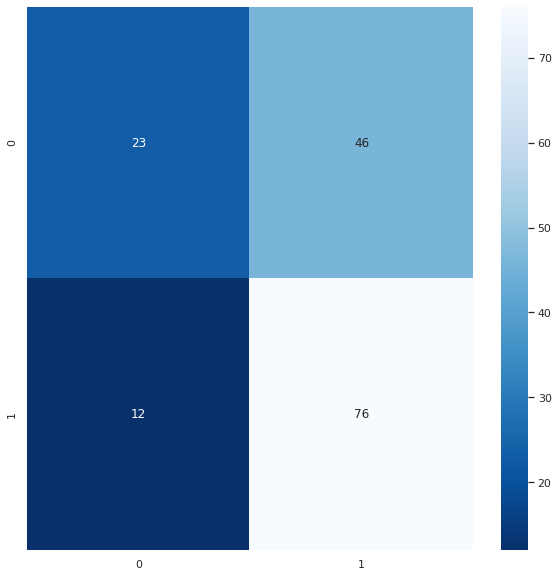

In [123]:
pred_test = clf.predict(X_test)

# посмотрим на матрицу ошибок
cm = confusion_matrix(y_test, pred_test)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Так как фермеру главное, чтобы молоко было вкусным, то нам нужно минимизировать ошибки первого рода. Необходимо максимизировать precision. Ошибок первого рода при пороге 0.5 много.

In [124]:
# сейчас будем подбирать порог логистической регрессии при помощи валидационной выборки
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False) 

data.head()

,y_valid,y_proba
85,1,0.861355
110,1,0.842792
66,1,0.841488
51,1,0.839668
8,1,0.817304


In [125]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 6,endpoint=False)]

# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x < i else 0)

# выведем 5 случайных строк
data.sample(5)

,y_valid,y_proba,y_pred_0.1,y_pred_0.25,y_pred_0.4,y_pred_0.55,y_pred_0.7,y_pred_0.85
20,1,0.595351,0,0,0,0,1,1
55,0,0.601936,0,0,0,0,1,1
112,0,0.387141,0,0,1,1,1,1
141,0,0.322466,0,0,1,1,1,1
109,1,0.647145,0,0,0,0,1,1


In [126]:
# посчитаем precission для разных значений

prec1 = precision_score(data['y_valid'], data['y_pred_0.1'])

prec25 = precision_score(data['y_valid'], data['y_pred_0.25'])

prec4 = precision_score(data['y_valid'], data['y_pred_0.4'])

prec55 = precision_score(data['y_valid'], data['y_pred_0.55'])

prec7 = precision_score(data['y_valid'], data['y_pred_0.7'])

prec85 = precision_score(data['y_valid'], data['y_pred_0.85'])

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
print(prec1)
print(prec25)
print(prec4)
print(prec55)
print(prec7)
print(prec85)

0.0
0.0
0.4375
0.3181818181818182
0.45535714285714285
0.5576923076923077


Возьмём порог равный 0.7, так как если его увеличить, то наша модель будет относить молоко ко вкусному только в случае, когда будет полностью в этом уверена. Фермер может потерять много полезных для него коров.

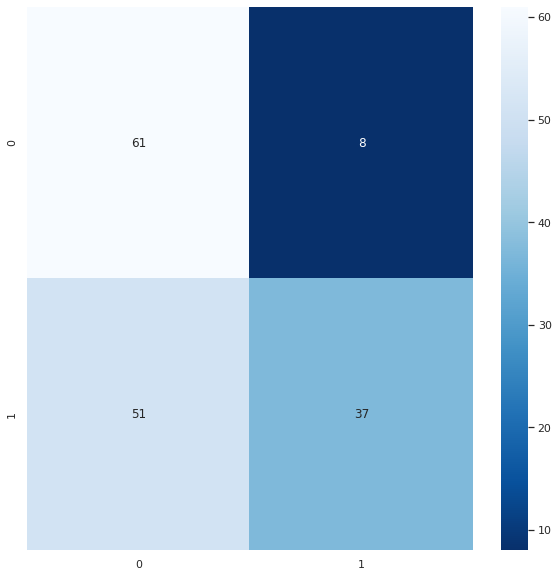

In [128]:
# посмотрим на матрицу ошибок
pred  = clf.predict_proba(X_test)[:,1]>=0.7
cm = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

В целом, модель совершает достаточно мало ложноположительных ошибок.
Важно сказать, что  в данных будут шумные строки - это те коровы, которые имеют все данные для вкусного молока, но дают невкусное. Бороться с шумом нет смысла, иначе пропустим всех коров, которые дают вкусное молоко.

In [129]:
# далее оценим качество модели

# accuracy
acc = accuracy_score(pred , y_test)
print(acc) 

0.6242038216560509


In [130]:
# recall
recall = recall_score(y_test, pred)
print(recall)

0.42045454545454547


In [131]:
precision = precision_score(y_test, pred)
print(precision)

0.8222222222222222


Accuracy, конечно, проседает, но модель совершает мало ошибок FP (ошибки первого рода). Далее прескажем вкус молока в таблице cow_buy.

### Прогноз вкуса молока в cow_buy

In [132]:
cow_buy

,breed,pasture,dad_breed,dad_name,fat,protein,age,sugar_protein_ratio,energy_feed_unit,raw_protein
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,0.958744,15.276162,2019.947532
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.958744,15.276162,2019.947532
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,0.958744,15.276162,2019.947532


In [133]:
# для начала необходимо подготовить данные таблицы cow_buy
cow_buy_taste = cow_buy
cow_buy_taste.head() # проверим

,breed,pasture,dad_breed,dad_name,fat,protein,age,sugar_protein_ratio,energy_feed_unit,raw_protein
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532


In [134]:
# уберем нелинейность
cow_buy_taste['energy_feed_unit'] = cow_buy_taste['energy_feed_unit'] ** 2

# теперь переведем в бинарный признак СПО
cow_buy_taste['sugar_protein_ratio'] = 'Высокое СПО'

cow_buy_taste

,breed,pasture,dad_breed,dad_name,fat,protein,age,sugar_protein_ratio,energy_feed_unit,raw_protein
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,Высокое СПО,233.361138,2019.947532
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,Высокое СПО,233.361138,2019.947532
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,Высокое СПО,233.361138,2019.947532
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,Высокое СПО,233.361138,2019.947532
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,Высокое СПО,233.361138,2019.947532
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,Высокое СПО,233.361138,2019.947532
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,Высокое СПО,233.361138,2019.947532
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,Высокое СПО,233.361138,2019.947532
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,Высокое СПО,233.361138,2019.947532
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,Высокое СПО,233.361138,2019.947532


In [135]:
# кодируем качественные переменные
taste_ohe = encoder.transform(cow_buy_taste[cat])

encoder_col_names = encoder.get_feature_names() # сохраним названия новых столбцов

taste_ohe = pd.DataFrame(taste_ohe, columns=encoder.get_feature_names())

In [136]:
# масштабируем данные
taste_scaled = scaler.transform(cow_buy_taste[num])

taste_scaled = pd.DataFrame(taste_scaled, columns=num)

In [137]:
# объединяем входные переменные
taste = pd.concat([taste_ohe, taste_scaled], axis=1)

In [138]:
# делаем прогноз
target_taste = clf.predict_proba(taste)[:,1]>=0.7

In [139]:
# создадим дф из полученного целевого признака
target_taste = pd.DataFrame(target_taste, columns=['taste_milk'])

In [140]:
# выведем результат
target_taste

,taste_milk
0,True
1,False
2,False
3,False
4,False
5,False
6,True
7,False
8,False
9,True


## Коровы, которых можно купить с минимальным риском

После того, как мы предсказали вкус и удой молока у коров, которых фермер рассматривает для покупки, необходимо обхеденить данные в одну таблицу и выделить коров, которых фермер может купить с минимальным для себя риском.

In [141]:
# объединим целевые признаки в один датафрейм
target = pd.concat([target_taste, target_yield], axis=1)

target['taste_milk'] = np.where(target['taste_milk']==True, 1, 0)

In [142]:
cow_buy = cow_buy.reset_index() # сбросим индексы

In [143]:
# объеденим все данные
cow_buy = cow_buy.join(target)

In [144]:
cow_buy # проверим

,index,breed,pasture,dad_breed,dad_name,fat,protein,age,sugar_protein_ratio,energy_feed_unit,raw_protein,taste_milk,milk_yield
0,0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,Высокое СПО,233.361138,2019.947532,1,6609.919297
1,1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,Высокое СПО,233.361138,2019.947532,0,6378.711028
2,2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,Высокое СПО,233.361138,2019.947532,0,6283.999775
3,3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,Высокое СПО,233.361138,2019.947532,0,6593.089377
4,4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,Высокое СПО,233.361138,2019.947532,0,6542.146066
5,5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,Высокое СПО,233.361138,2019.947532,0,6425.380218
6,6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,Высокое СПО,233.361138,2019.947532,1,6609.919297
7,7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,Высокое СПО,233.361138,2019.947532,0,6571.259737
8,8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,Высокое СПО,233.361138,2019.947532,0,6283.999775
9,9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,Высокое СПО,233.361138,2019.947532,1,6400.540668


In [145]:
# выделим коров, которые дают удоя > 6000 и у которых вкусное молоко

display(cow_buy.query('taste_milk == 1 and milk_yield > 6000').drop(['index'], axis=1))

,breed,pasture,dad_breed,dad_name,fat,protein,age,sugar_protein_ratio,energy_feed_unit,raw_protein,taste_milk,milk_yield
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,Высокое СПО,233.361138,2019.947532,1,6609.919297
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,Высокое СПО,233.361138,2019.947532,1,6609.919297
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,Высокое СПО,233.361138,2019.947532,1,6400.540668


Фермер может купить коров под индексом 0, 6 и 9 с минимальными для себя рисками.

## Итоговые выводы

1. Была проведена выгрузка и предобработка данным. Пропуски отсутствовали, дубликаты были удалены, неявные -заменены.

2. Был произведен исследовательский анализ данных: 
- В столбце с удоем талицы ferma_main был заметен выброс, он был удалён. 
- В столбце с жирностью также много выбросов, но их решено оставить, так как отбрасывать такое количество данных нецелесообразно. 
- Категориальные данные распределены, в целом, равномерно, за исключением возраста коров - возрастных коров намного больше. 
- В датасете cow_buy аномальных значений замечено не было. Данные похожи на правду.

3. Во время проведения корреляционного анализа:
- Можно заметить, что значение protein совершенно не корелирует с целевым признаком (удой).
- Мультиколлинеарность не обнаружена (между целевыми признаками нет корреляции > 0.9).ой ferma_dad.
- Судя по графикам распределения, можно сделать вывод, что от породы коровы и типа пастбища особо ничего не зависит. 
- Целевой признак при учете данных переменных распределен равномерно, что нельзя сказать о породе папы и возрасте коровы. 
- Скорее всего, от папы зависят наследственные данных, а от возраста - насколько развился организм животного.

4. Была решена задача линейной регрессии при помощи модели машинного обучения. Было обучено три модели, затем была проведена оценка качества моделей. По итогам оценки лучшей оказалась 3-я модель, с помощью которой и был предсказан удой молока.

5. Также была решена задача логистической регрессии. Был выбран порог лог. регрессии, для того чтобы минимизировать риски для фермера. Порог рассчитывался исходя из потребностей фермера (главное - вкус молока). Поэтому было необходимо максимизировать precision (уменьшить ошибки FP). 

### Заключение:
- По итогам проведенной работы, с минимальными рисками фермер может купить коров под индексом 0, 6, 9.